In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


Load data

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df. head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Selecct Features of clustring

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

Normalize The Data

In [ ]:
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)

Ploting the data

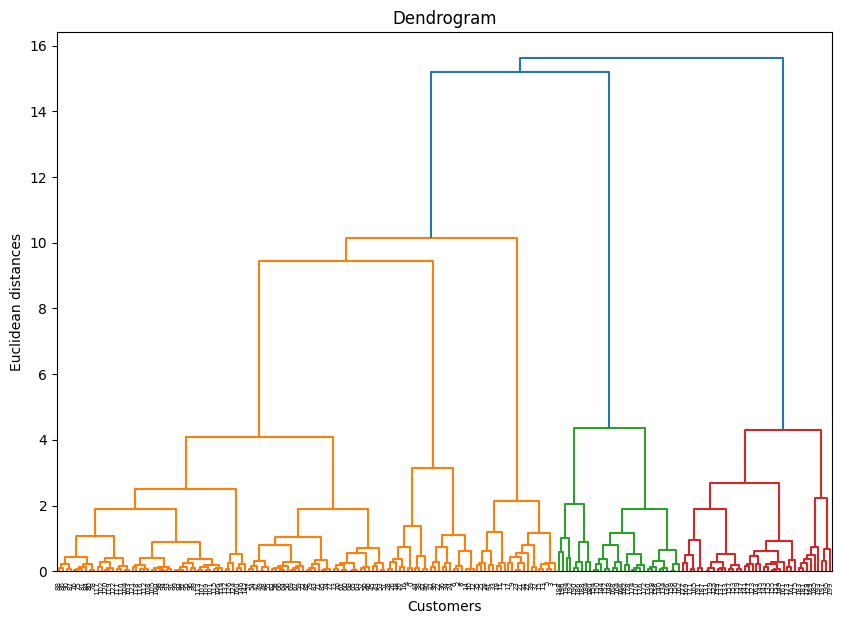

In [ ]:
linked = linkage(X_scaled, method = 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Applying Hierarchical Clustring

In [ ]:
labels = fcluster(linked, 5, criterion='maxclust')
df['Cluster'] = labels

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


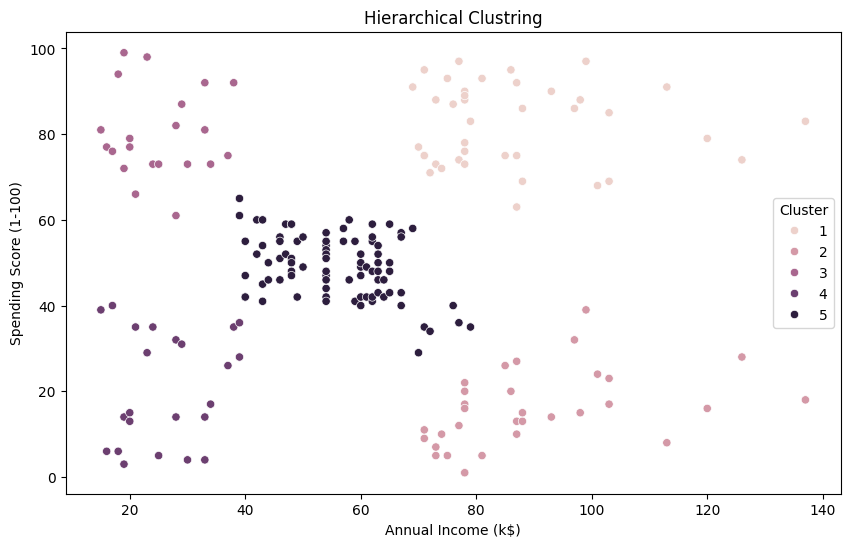

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df)
plt.title('Hierarchical Clustring')
plt.show()